In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('batterycrimeschicagoforecast.csv',parse_dates=True)

In [3]:
df.head()

,Year,Month,Day,Date,Battery Crimes,Arrests
0,2012,1,1,1/1/12,4307,951
1,2012,2,1,2/1/12,3961,897
2,2012,3,1,3/1/12,5275,1207
3,2012,4,1,4/1/12,4695,1048
4,2012,5,1,5/1/12,5840,1279


In [4]:
df = df.rename(columns = {'Battery Crimes': 'Crimes'})

In [5]:
df.head()

,Year,Month,Day,Date,Crimes,Arrests
0,2012,1,1,1/1/12,4307,951
1,2012,2,1,2/1/12,3961,897
2,2012,3,1,3/1/12,5275,1207
3,2012,4,1,4/1/12,4695,1048
4,2012,5,1,5/1/12,5840,1279


In [6]:
crime = df[['Date','Crimes']]
crime.index.freq='MS'

In [7]:
crime

,Date,Crimes
0,1/1/12,4307
1,2/1/12,3961
2,3/1/12,5275
3,4/1/12,4695
4,5/1/12,5840
...,...,...
91,8/1/19,2528
92,9/1/19,3325
93,10/1/19,2361
94,11/1/19,3577


In [8]:
crime.set_index('Date',inplace=True)
crime.index = pd.to_datetime(crime.index)

<AxesSubplot:xlabel='Date'>

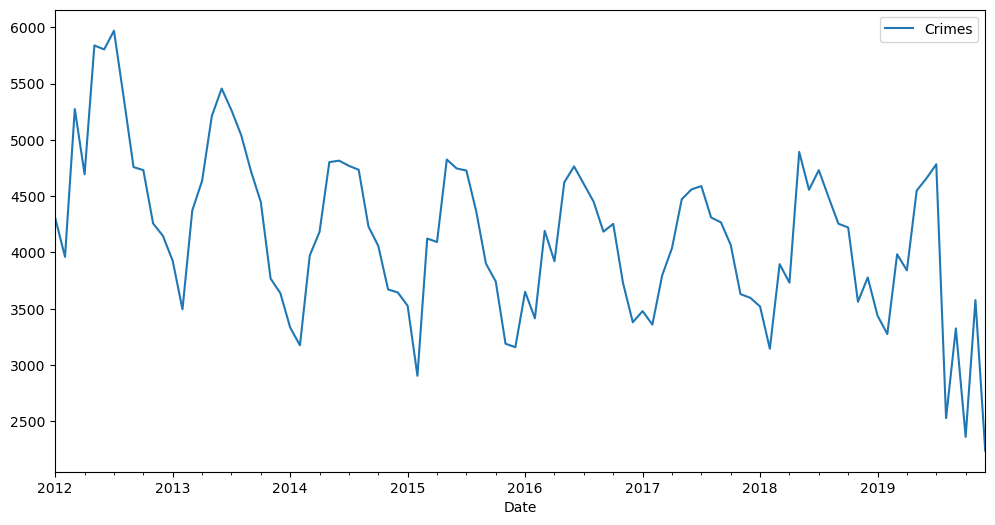

In [9]:
crime.plot(figsize=(12,6))

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

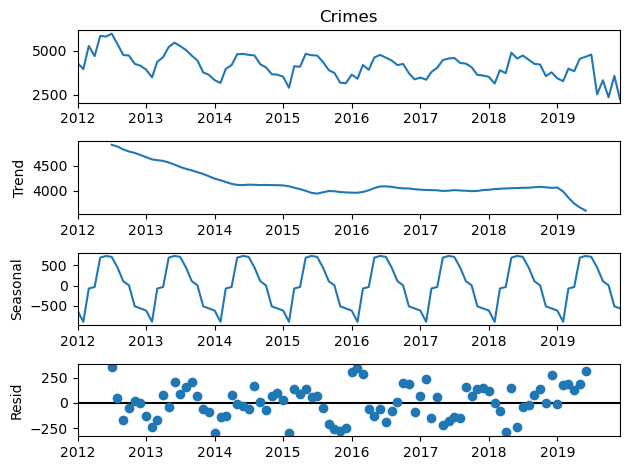

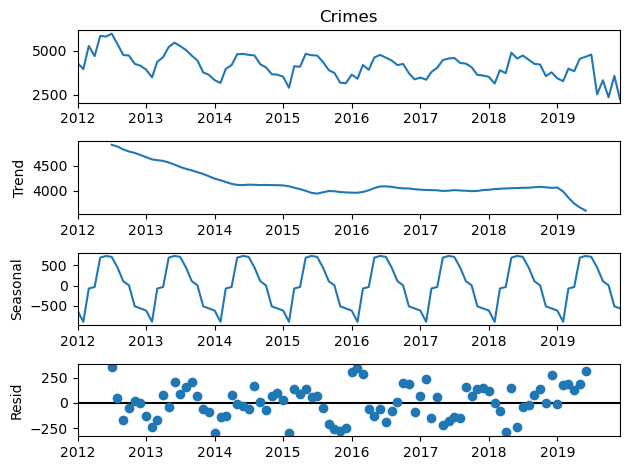

In [11]:
results = seasonal_decompose(crime['Crimes'])
results.plot()

In [12]:
len(crime)

96

In [13]:
train = crime.iloc[:86]
test = crime.iloc[86:]

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [15]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length = n_input, batch_size=1)

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [24]:
#Definte model
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
